In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [4]:
# meta = getDF('meta_Electronics.json.gz')

In [5]:
# df = pd.read_csv('data.csv')

In [6]:
import pickle
# df = []
# df_meta = []
df_review_headphones = []
df_meta_headphones = []
# with open("electronics_5_df.bin","rb") as file:
#     df = pickle.load(file)
# with open("meta_Electronics_df.bin","rb") as file:
#     df_meta = pickle.load(file)
with open("./df_review_headphones.bin","rb") as file:
    review = pickle.load(file)

with open("meta_headphones_df.bin","rb") as file:
    meta = pickle.load(file)

In [7]:
# ## Load data
# data = pd.read_json("Electronics_5.json", lines=True) 

In [8]:
meta.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
8,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br>With ...",,Wireless Bluetooth Headphones Earbuds with Mic...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,[>#950 in Cell Phones & Accessories (See Top 1...,[],Home Audio & Theater,,"October 23, 2017",$7.99,0132492776,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
47,"[Electronics, Headphones]",,[Use these high quality headphones for interne...,,Polaroid Pbm2200 PC / Gaming Stereo Headphones...,[],,Polaroid,"[Ideal for PC Internet chatting, PC / Console ...","[>#3,548,269 in Cell Phones &amp; Accessories ...",[],All Electronics,,"December 13, 2012",,0558835155,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
132,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br>With ...",,Bluetooth Workout Headphones for Running and G...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,"[>#4,626,934 in Cell Phones & Accessories (See...",[],Home Audio & Theater,,"December 28, 2015",,0692206280,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
223,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br />Wit...",,Bluetooth Workout Headphones for Running and G...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,"[>#2,654,020 in Cell Phones &amp; Accessories ...",[],Home Audio &amp; Theater,,"October 18, 2015",,0983629269,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
229,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br />Wit...",,Bluetooth Workout Headphones for Running and G...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,"[>#5,289,289 in Cell Phones &amp; Accessories ...",[],Home Audio &amp; Theater,,"April 26, 2013",,0985262788,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [9]:
review.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
2441,5.0,NaN,True,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,{'Color:': ' Blue W/Mic'},George Walker,Great headphones. It's just the cord is too sh...,Five Stars,1424563200,NaN
2442,5.0,NaN,True,"05 8, 2017",A299MRB9O6GWDE,4126895493,{'Color:': ' Blue Zebra W/Mic'},Carolyn B,Really like these headphone. Wanted something...,Officewear,1494201600,NaN
2443,1.0,NaN,True,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,{'Color:': ' Blue W/Mic'},MK,Wire to headphone broke off in less than a mon...,For the money they are fine. Just hope they ho...,1478304000,NaN
2444,3.0,NaN,True,"09 24, 2016",A36BC0YFDBNB5X,4126895493,{'Color:': ' Green'},bigboy,Very good,Three Stars,1474675200,NaN
2445,1.0,NaN,True,"07 17, 2016",A212PQ0HQPNNWM,4126895493,{'Color:': ' Violet Purple'},Kelly Hales,Currently returning this product because the s...,Currently returning this product because the s...,1468713600,NaN


In [10]:
review.isnull().sum()

overall                0
vote              356169
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             156134
reviewerName          58
reviewText            54
summary               75
unixReviewTime         0
image             402891
dtype: int64

In [11]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411238 entries, 2441 to 6739561
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         411238 non-null  float64
 1   vote            55069 non-null   object 
 2   verified        411238 non-null  bool   
 3   reviewTime      411238 non-null  object 
 4   reviewerID      411238 non-null  object 
 5   asin            411238 non-null  object 
 6   style           255104 non-null  object 
 7   reviewerName    411180 non-null  object 
 8   reviewText      411184 non-null  object 
 9   summary         411163 non-null  object 
 10  unixReviewTime  411238 non-null  int64  
 11  image           8347 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 38.0+ MB


In [12]:
review.drop(['image'], axis=1, inplace=True)
review.dropna(inplace=True)

In [13]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33656 entries, 4824 to 6738492
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         33656 non-null  float64
 1   vote            33656 non-null  object 
 2   verified        33656 non-null  bool   
 3   reviewTime      33656 non-null  object 
 4   reviewerID      33656 non-null  object 
 5   asin            33656 non-null  object 
 6   style           33656 non-null  object 
 7   reviewerName    33656 non-null  object 
 8   reviewText      33656 non-null  object 
 9   summary         33656 non-null  object 
 10  unixReviewTime  33656 non-null  int64  
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 2.9+ MB


In [14]:
## Number of reviews, average rating, number of unique products, Number of good and bad reviews and number of reviews per rating
num_reviews = review.shape[0]
avg_rating = review['overall'].mean()
unique_products = review['asin'].nunique()
good_reviews = review[review['overall'] >= 4].shape[0]
bad_reviews = review[review['overall'] < 4].shape[0]
num_reviews_per_rating = review['overall'].value_counts()

print("Number of reviews: ", num_reviews)
print("Average rating: ", avg_rating)
print("Number of unique products: ", unique_products)
print("Number of good reviews: ", good_reviews)
print("Number of bad reviews: ", bad_reviews)
print("Number of reviews per rating: \n", num_reviews_per_rating)

Number of reviews:  33656
Average rating:  3.8614808652246255
Number of unique products:  3292
Number of good reviews:  23188
Number of bad reviews:  10468
Number of reviews per rating: 
 overall
5.0    16744
4.0     6444
1.0     4184
3.0     3714
2.0     2570
Name: count, dtype: int64


In [15]:
!pip install inflect


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
## Preprocess the text, remove html tags, remove punctuation, expand abbreviations, lemmatise, rmove accents

import re
from bs4 import BeautifulSoup
import unicodedata
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    return text

def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

def expand_contractions(text):
    text = contractions.fix(text)
    return text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def lemmatise(text):
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

def preprocess_text(text):
    text = remove_html_tags(text)
    text = remove_punctuation(text)
    text = expand_contractions(text)
    text = remove_accented_chars(text)
    text = lemmatise(text)
    return text

In [17]:
## Apply the preprocessing steps to the reviewText column and summary column
review['reviewText'] = review['reviewText'].apply(preprocess_text)
review['summary'] = review['summary'].apply(preprocess_text)

C:\Users\ATHARVA\AppData\Local\Temp\ipykernel_5136\3807755124.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [18]:
review.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
4824,5.0,2,True,"02 28, 2013",A15U5NUS1EY7IQ,B000001OMI,{'Format:': ' Personal Computers'},S. Bommarito,I Am getting listening station going in severa...,Works well,1362009600
4827,5.0,4,True,"11 27, 2008",A680RUE1FDO8B,B000001OMI,{'Format:': ' Personal Computers'},Jerry Saperstein,Obviously these headphone are not for the audi...,Excellent daytoday headphone,1227744000
4828,3.0,2,False,"12 24, 2007",A3OLAZKM77XR6P,B000001OMI,{'Format:': ' Personal Computers'},Tennis Ace,I bought these headphone at a Tower Records ab...,Foldable but did not last long,1198454400
4884,5.0,2,True,"10 27, 2013",A32I07L6RTFMUA,B000001OMI,{'Format:': ' Personal Computers'},Shari,I Am not a fussy headphone buyer I like them s...,Great Cheap Headphones,1382832000
5184,1.0,14,False,"09 9, 2005",A27U0CLB8ZMRVP,B000001OMR,{'Format:': ' Personal Computers'},joesuspense,because they suck I bought these when I wa wal...,Guess why these are 399,1126224000


In [19]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27425 entries, 8 to 786406
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         27425 non-null  object
 1   tech1            27425 non-null  object
 2   description      27425 non-null  object
 3   fit              27425 non-null  object
 4   title            27425 non-null  object
 5   also_buy         27425 non-null  object
 6   tech2            27425 non-null  object
 7   brand            27425 non-null  object
 8   feature          27425 non-null  object
 9   rank             27425 non-null  object
 10  also_view        27425 non-null  object
 11  main_cat         27425 non-null  object
 12  similar_item     27425 non-null  object
 13  date             27425 non-null  object
 14  price            27425 non-null  object
 15  asin             27425 non-null  object
 16  imageURL         27425 non-null  object
 17  imageURLHighRes  27425 non-null  ob

In [20]:
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Top 20 most reviewed brands: 
 brand
Sony              861
Sennheiser        390
Audio-Technica    370
JVC               367
Philips           330
Generic           319
Beats             309
Skullcandy        294
Panasonic         276
VOWSVOWS          266
Geekria           234
Koss              179
ebasy             163
Monster           143
Bose              137
                  135
Urbanears         135
Besiva            133
AKG               112
JBL               106
Name: count, dtype: int64
Top 20 least reviewed brands: 
 brand
LY-TECH                1
Waterfly               1
Mobityze               1
SHQianJiaTian          1
U-Easy Tech Limited    1
B&WSC2SET              1
Rebelite               1
Generia                1
Tianhong               1
Kissmart               1
Hybrid                 1
Novodio                1
Jam Fusion             1
XT-XINTE               1
shunyou                1
RIF6                   1
eCaseUSA               1
Esky                   1
T&J Exclu

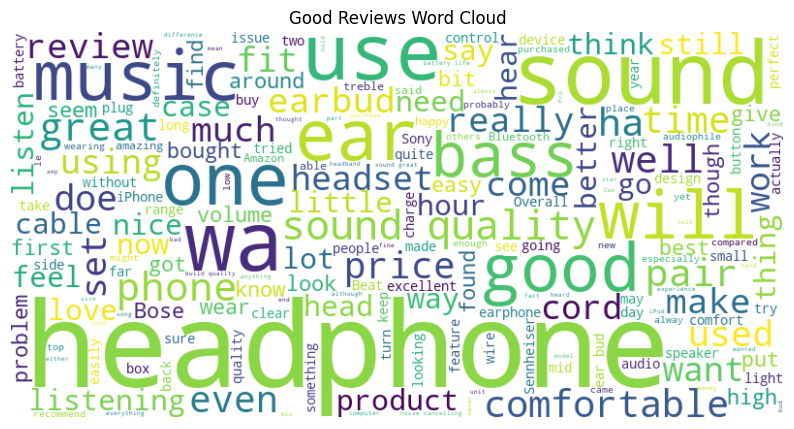

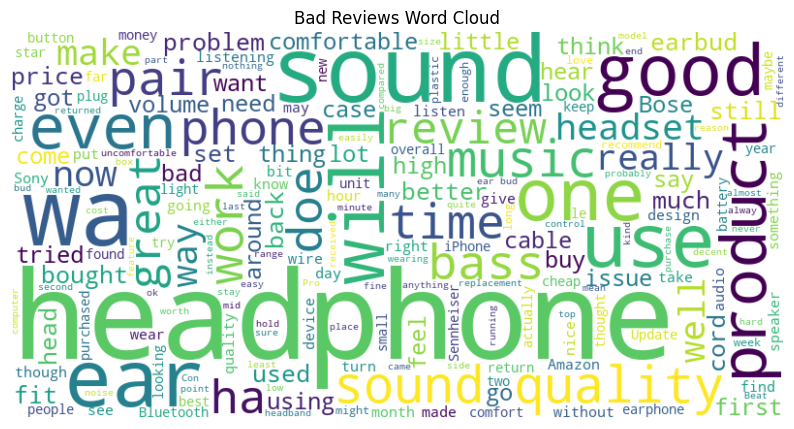

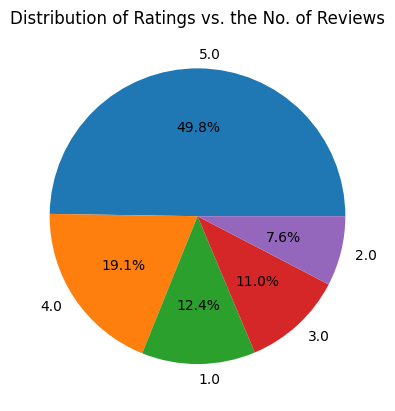

Year with maximum reviews:  2016
Year with highest number of customers:  19


In [22]:
#a. Top 20 most reviewed brands in the category that you have chosen.
# b. Top 20 least reviewed brands in the category you have chosen.
# c. Which is the most positively reviewed ‘Headphone’ ( Or for any other
# electronic product you have selected)
# d. Show the count of ratings for the product over 5 consecutive years.
# e. Form a Word Cloud for ‘Good’ and ‘Bad’ ratings. Report the most

# commonly used words for positive and negative reviews by observing the
# good and bad word clouds.
# f. Plot a pie chart for Distribution of Ratings vs. the No. of Reviews.
# g. Report in which year the product got maximum reviews.
# h. Which year has the highest number of Customers?

from wordcloud import WordCloud
from collections import Counter

# Top 20 most reviewed brands
most_reviewed_brands = meta['brand'].value_counts().head(20)
print("Top 20 most reviewed brands: \n", most_reviewed_brands)

## Top 20 least reviewed brands
least_reviewed_brands = meta['brand'].value_counts().tail(20)
print("Top 20 least reviewed brands: \n", least_reviewed_brands)

# # Most positively reviewed in rating >= 4
# most_positively_reviewed_headphone = review[review['overall'] >= 4].value_counts().idxmax()
# print("Most positively reviewed 'Headphone': ", most_positively_reviewed_headphone)

## Count of ratings for the product over 5 consecutive years
review['reviewTime'] = pd.to_datetime(review['reviewTime']) 
review['year'] = review['reviewTime'].dt.year

ratings_count = review.groupby(['asin', 'year'])['overall'].count().reset_index()
ratings_count = ratings_count.pivot(index='asin', columns='year', values='overall').fillna(0)
ratings_count.columns = ratings_count.columns.astype(int)
ratings_count = ratings_count.loc[:, 2012:2016]
print("Count of ratings for the product over 5 consecutive years: \n", ratings_count)

## Word Cloud for 'Good' and 'Bad' ratings
good_reviews = review[review['overall'] >= 4]['reviewText'].str.cat(sep=' ')
bad_reviews = review[review['overall'] < 4]['reviewText'].str.cat(sep=' ')

good_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(good_reviews)
bad_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bad_reviews)

plt.figure(figsize=(10, 10))
plt.imshow(good_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Good Reviews Word Cloud')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(bad_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Bad Reviews Word Cloud')
plt.show()

## Distribution of Ratings vs. the No. of Reviews
distribution_of_ratings = review['overall'].value_counts()
plt.pie(distribution_of_ratings, labels=distribution_of_ratings.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings vs. the No. of Reviews')
plt.show()

## Year with maximum reviews
year_with_maximum_reviews = review['year'].value_counts().idxmax()
print("Year with maximum reviews: ", year_with_maximum_reviews)

## Year with highest number of customers
year_with_highest_number_of_customers = review['year'].nunique()
print("Year with highest number of customers: ", year_with_highest_number_of_customers)



In [23]:
# Use a relevant feature engineering technique to model review text as Bag of
# Words model, TF-IDF, Hashing Vectorizer or Word2Vec.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(review['reviewText'])
tfidf = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf.head()

,10,100,12,14,15,20,200,25,30,300,...,worth,would,wow,wrong,year,yes,yet,you,your,yourself
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.121726,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.111282,0.0,0.0,0.062481,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.031568,0.0,0.0
4,0.081254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.068752,0.0,0.0


In [24]:
# The Rating Class is divided into three categories
# ● > 3 as Good
# ● =3 as Average
# ● <3 as Bad.

target_df = review['overall'].apply(lambda x: 'Good' if x > 3 else 'Average' if x == 3 else 'Bad')
target_df.value_counts()

overall
Good       23188
Bad         6754
Average     3714
Name: count, dtype: int64

In [27]:
# From the dataset, take the Review Text as input feature and Rating Class as target
# variable. Divide the data into Train and Test Data in the ratio of 75:25.

from sklearn.model_selection import train_test_split

X = tfidf
y = target_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [29]:
# 10.Compare the performance of 5 Machine Learning based models on the basis of
# Precision, Recall, F-1 Score and Support for each of the 3 target classes distinctly.

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier()
}

## Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))
    
    

Logistic Regression
              precision    recall  f1-score   support

     Average       0.45      0.11      0.18       921
         Bad       0.71      0.65      0.68      1653
        Good       0.83      0.95      0.89      5840

    accuracy                           0.80      8414
   macro avg       0.66      0.57      0.58      8414
weighted avg       0.77      0.80      0.77      8414

Random Forest
              precision    recall  f1-score   support

     Average       0.99      0.07      0.14       921
         Bad       0.80      0.42      0.55      1653
        Good       0.77      0.99      0.87      5840

    accuracy                           0.78      8414
   macro avg       0.85      0.49      0.52      8414
weighted avg       0.80      0.78      0.72      8414

SVC
              precision    recall  f1-score   support

     Average       0.54      0.06      0.10       921
         Bad       0.74      0.65      0.69      1653
        Good       0.82      0.97    

In [25]:
print(len(review))

33656


In [26]:
# 11. Collaborative Filtering :
# a) Create a user-item rating matrix
# b) Normalize the ratings, by using min-max scaling on user’s reviews
# c) Create a user-user recommender system - i.e,
# i) Find the top N similar users, by using cosine similarity. N = 10, 20, 30,
# 40, 50
# ii) Use K-folds validation. K = 5. Explanation: Create 5 subsets, and take 1
# of them as the validation set. Take the rest 4 to be the training set.
# iii) Use the training set to predict the missing values, and use the validation
# set to calculate the error. (Error = |actual_rating - predicted_rating|)
# iv) Report the MAE (Mean Absolute Error) for taking K = 10, 20, 30, 40,
# 50 similar users.
# d) Create an item-item recommender system. Use the same steps as above.
# e) Plot separate graphs for each of the two recommender systems, plotting
# MAE against K

from sklearn.metrics.pairwise import cosine_similarity

## Sample the data
review = review.sample(frac=0.01, random_state=42)

## Remove duplicates
review = review.drop_duplicates(subset=['reviewerID', 'asin'])

## Create a user-item rating matrix
user_item_rating_matrix = review.pivot(index='reviewerID', columns='asin', values='overall').fillna(0)

## Normalize the ratings
user_item_rating_matrix = user_item_rating_matrix.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

## Create a user-user recommender system
def user_user_recommender(user_item_rating_matrix, N, K):
    user_similarity = pd.DataFrame(cosine_similarity(user_item_rating_matrix), index=user_item_rating_matrix.index, columns=user_item_rating_matrix.index)
    user_similarity = user_similarity.apply(lambda x: x.nlargest(N).index, axis=1)
    mae = []
    for i in range(K):
        user_item_rating_matrix_copy = user_item_rating_matrix.copy()
        for user in user_similarity.index:
            for item in user_item_rating_matrix.columns:
                if user_item_rating_matrix.loc[user, item] == 0:
                    user_item_rating_matrix_copy.loc[user, item] = user_item_rating_matrix.loc[user_similarity.loc[user], item].mean()
        mae.append(np.abs(user_item_rating_matrix_copy - user_item_rating_matrix).mean().mean())
    return mae

## Create an item-item recommender system
def item_item_recommender(user_item_rating_matrix, N, K):
    item_similarity = pd.DataFrame(cosine_similarity(user_item_rating_matrix.T), index=user_item_rating_matrix.columns, columns=user_item_rating_matrix.columns)
    item_similarity = item_similarity.apply(lambda x: x.nlargest(N).index, axis=1)
    mae = []
    for i in range(K):
        user_item_rating_matrix_copy = user_item_rating_matrix.copy()
        for item in item_similarity.index:
            for user in user_item_rating_matrix.index:
                if user_item_rating_matrix.loc[user, item] == 0:
                    user_item_rating_matrix_copy.loc[user, item] = user_item_rating_matrix.loc[user, item_similarity.loc[item]].mean()
        mae.append(np.abs(user_item_rating_matrix_copy - user_item_rating_matrix).mean().mean())
    return mae

## Plot MAE against K
N = 10
K = [10, 20, 30, 40, 50]

user_user_mae = []
item_item_mae = []

for k in K:
    user_user_mae.append(user_user_recommender(user_item_rating_matrix, N, k))
    print("Done iteration: ", k)
    item_item_mae.append(item_item_recommender(user_item_rating_matrix, N, k))
    
plt.figure(figsize=(10, 5))
plt.plot(K, user_user_mae, label='User-User Recommender System')
plt.plot(K, item_item_mae, label='Item-Item Recommender System')
plt.xlabel('K')
plt.ylabel('MAE')
plt.title('MAE vs K')
plt.legend()
plt.show()

Done iteration:  10
Done iteration:  20
Done iteration:  30
Done iteration:  40


In [ ]:
## 12.Also, report the TOP 10 products by User Sum Ratings.

top_10_products = review.groupby('asin')['overall'].sum().nlargest(10)
print("Top 10 products by User Sum Ratings: \n", top_10_products)